In [113]:
# Import necessary libraries for data analysis, visualization, and machine learning
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import pickle

In [114]:
# Load the e-commerce customer dataset and display first 5 rows
df = pd.read_csv('Ecommerce.csv')
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [115]:
# Display dataset information including column types, non-null counts, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [116]:
# Generate descriptive statistics for numerical columns (mean, std, min, max, etc.)
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


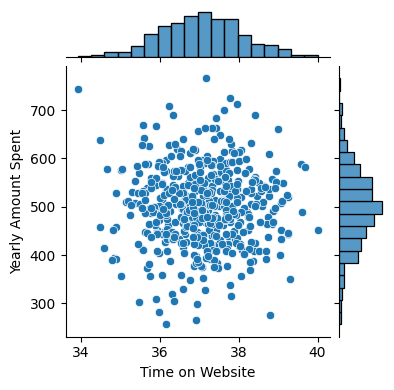

In [117]:
# Create a joint plot to visualize the relationship between Time on Website and Yearly Amount Spent
# Shows both scatter plot and marginal distributions
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=df, height=4, kind='scatter')

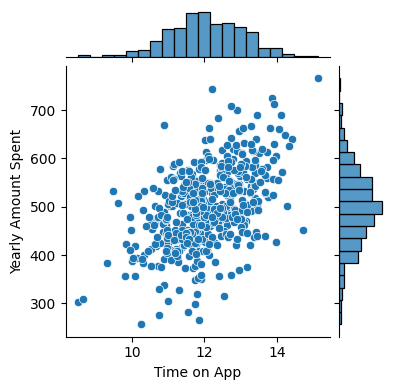

In [118]:
# Create a joint plot to visualize the relationship between Time on App and Yearly Amount Spent
# Helps identify which platform (app vs website) has stronger correlation with spending
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=df, height=4, kind='scatter')

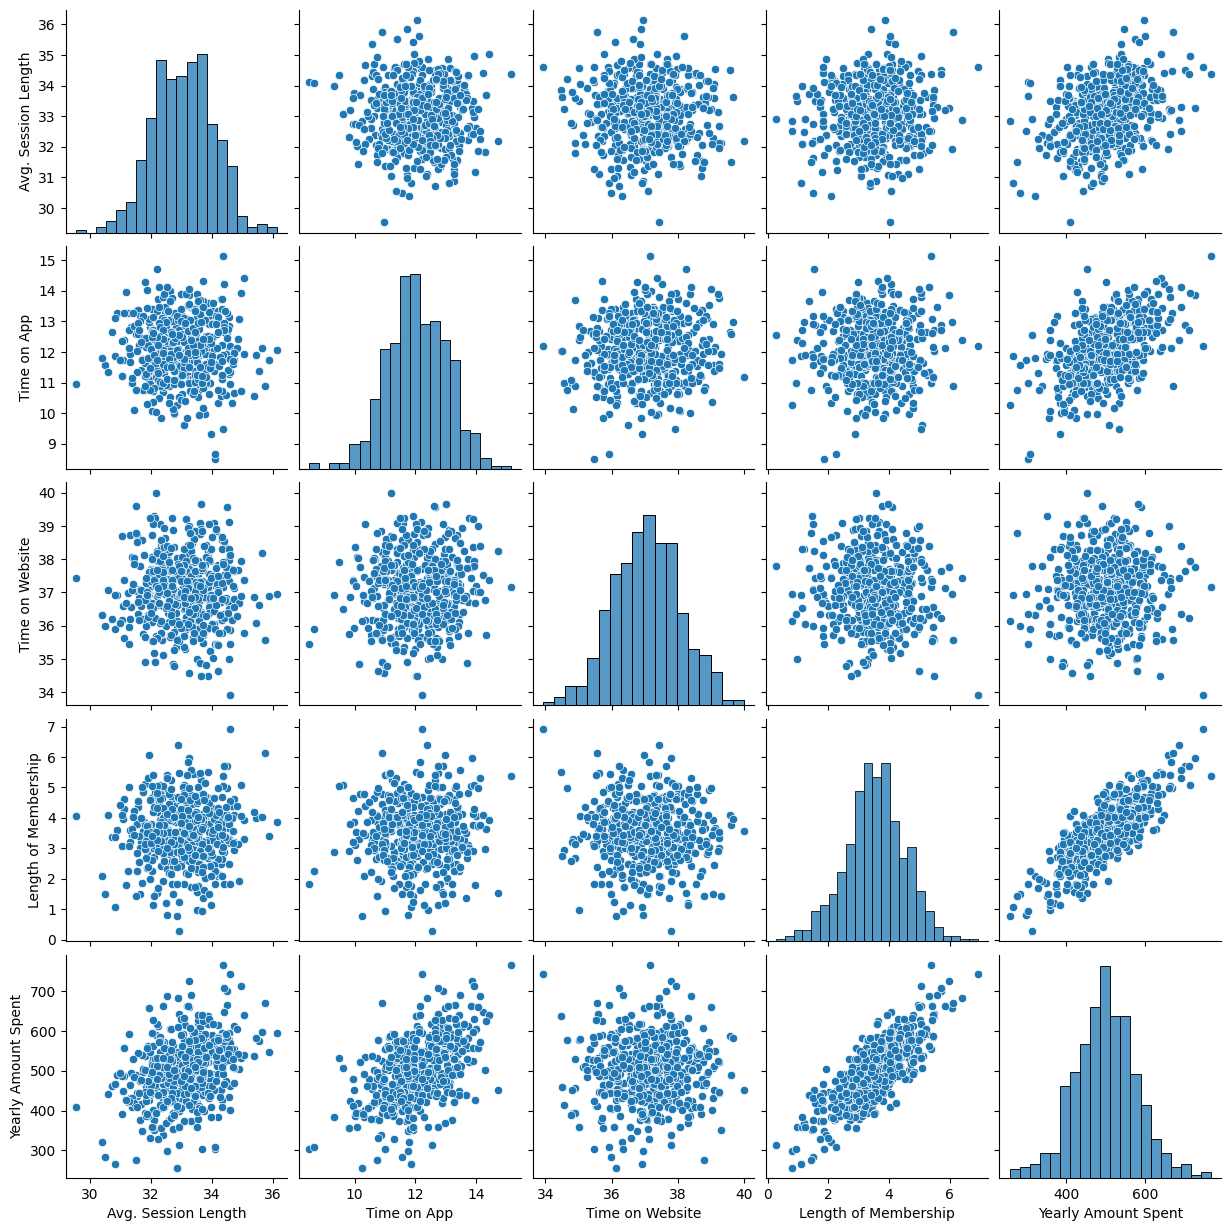

In [119]:
# Create a pairplot to visualize relationships between all numerical variables
# Diagonal shows distributions, off-diagonal shows scatter plots between variable pairs
sns.pairplot(df, height=2.5)

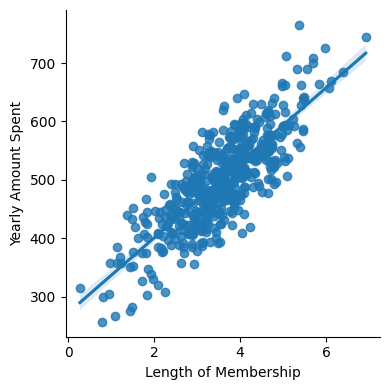

In [120]:
# Create a linear regression plot showing relationship between Length of Membership and Yearly Amount Spent
# This shows the strongest predictor of customer spending
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=df, height=4)

In [121]:
# Prepare data for machine learning model
# X: Feature variables (independent variables)
# y: Target variable (dependent variable - what we want to predict)
# Split data into training (70%) and testing (30%) sets with fixed random state for reproducibility
from sklearn.model_selection import train_test_split

x = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=41)

In [122]:
# Create a pipeline with StandardScaler and Linear Regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

pipeline.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('scaler', ...), ('regressor', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None


In [123]:
# View the model coefficients for each feature
lm = pipeline.named_steps['regressor']
coef_df = pd.DataFrame(lm.coef_, x.columns, columns=['Coefficient'])
coef_df

,Coefficient
Avg. Session Length,25.263188
Time on App,38.257814
Time on Website,0.350782
Length of Membership,60.381173


In [124]:
# Pipeline automatically applies scaling before prediction
predictions = pipeline.predict(X_test)
predictions

array([358.17354871, 506.73317998, 424.57744348, 384.84359634,
       448.82449541, 566.7541131 , 569.34992622, 400.38207324,
       545.85898432, 610.29938589, 378.16575171, 399.87361866,
       462.7541932 , 512.23915457, 491.31306275, 552.73708147,
       568.86889603, 547.38823754, 438.4019437 , 556.3748727 ,
       548.05655709, 456.59217486, 440.81422692, 605.08148599,
       446.1741758 , 500.60595386, 438.34723022, 505.84445057,
       564.05138759, 562.72147577, 535.08838042, 491.38706887,
       576.99548246, 497.448031  , 468.79221939, 392.75432656,
       515.89787294, 683.36124067, 523.42835267, 402.88512128,
       552.55905968, 587.00063541, 402.14468022, 404.51017887,
       542.59475501, 530.33295161, 592.27580499, 494.09537867,
       438.60225881, 572.14374723, 470.96405492, 495.37883604,
       460.36772252, 518.73562763, 600.37859017, 471.99469437,
       501.50303125, 480.09530873, 691.38383748, 562.18618183,
       549.53475994, 535.38543194, 560.43797539, 418.50

Text(0.5, 1.0, 'Y Test vs Predicted Values')

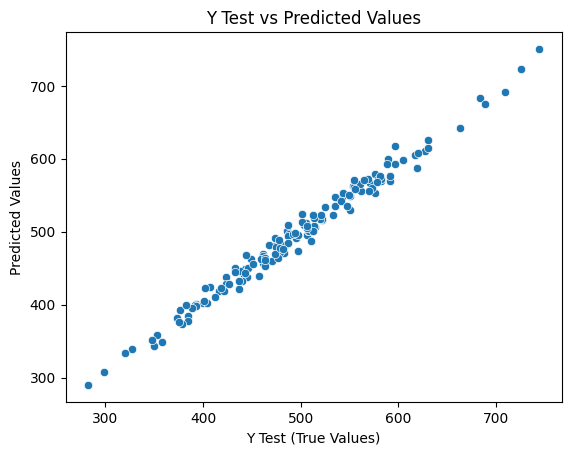

In [125]:
# Visualize model performance by plotting actual vs predicted values
sns.scatterplot(x=y_test, y=predictions)
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted Values')
plt.title('Y Test vs Predicted Values')

In [126]:
# Evaluate model performance using multiple metrics
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

MAE: 8.421863155693982
MSE: 110.89877778149055
RMSE: 10.530848863291627


Text(0.5, 0, 'Residuals')

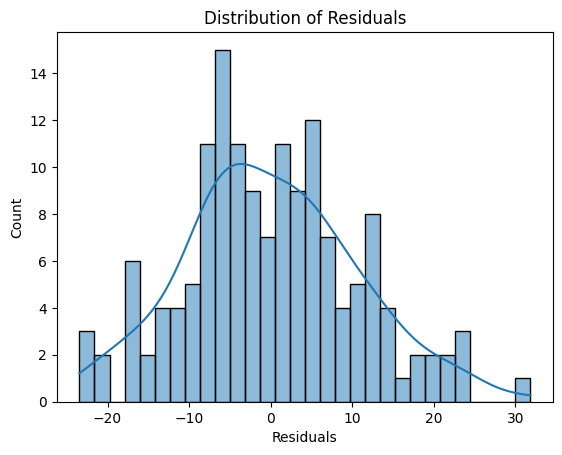

In [127]:
# Plot residuals (prediction errors) to check model assumptions
residuals = y_test - predictions
sns.histplot(residuals, bins=30, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')

In [128]:
# Save the trained pipeline model to a file using pickle
with open('ecommerce_model_pipeline.pkl', 'wb') as file:
    pickle.dump(pipeline, file)

print("Model saved successfully as 'ecommerce_model_pipeline.pkl'")

Model saved successfully as 'ecommerce_model_pipeline.pkl'


In [129]:
# Generate realistic values based on the dataset's statistical ranges
np.random.seed(42)  # For reproducibility

random_inputs = pd.DataFrame({
    'Avg. Session Length': np.random.uniform(29, 37, 5),
    'Time on App': np.random.uniform(8, 15, 5),
    'Time on Website': np.random.uniform(33, 40, 5),
    'Length of Membership': np.random.uniform(0.5, 6.5, 5)
})

print("Random Input Values:")
print(random_inputs)
print("\n" + "="*60 + "\n")

# Load the saved model and make predictions
with open('ecommerce_model_pipeline.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Make predictions
predicted_spending = loaded_model.predict(random_inputs)

# Display predictions
print("Predicted Yearly Amount Spent:")
for i, (idx, row) in enumerate(random_inputs.iterrows()):
    print(f"\nCustomer {i+1}:")
    print(f"  Avg. Session Length: {row['Avg. Session Length']:.2f} minutes")
    print(f"  Time on App: {row['Time on App']:.2f} minutes")
    print(f"  Time on Website: {row['Time on Website']:.2f} minutes")
    print(f"  Length of Membership: {row['Length of Membership']:.2f} years")
    print(f"  → Predicted Yearly Spending: ${predicted_spending[i]:.2f}")

Random Input Values:
   Avg. Session Length  Time on App  Time on Website  Length of Membership
0            31.996321     9.091962        33.144091              1.600427
1            36.605714     8.406585        39.789369              2.325453
2            34.855952    14.063233        38.827098              3.648539
3            33.789268    12.207805        34.486374              3.091670
4            30.248149    12.956508        34.272775              2.247375


Predicted Yearly Amount Spent:

Customer 1:
  Avg. Session Length: 32.00 minutes
  Time on App: 9.09 minutes
  Time on Website: 33.14 minutes
  Length of Membership: 1.60 years
  → Predicted Yearly Spending: $240.43

Customer 2:
  Avg. Session Length: 36.61 minutes
  Time on App: 8.41 minutes
  Time on Website: 39.79 minutes
  Length of Membership: 2.33 years
  → Predicted Yearly Spending: $377.95

Customer 3:
  Avg. Session Length: 34.86 minutes
  Time on App: 14.06 minutes
  Time on Website: 38.83 minutes
  Length of Me